In [70]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration.DataExploration import *
import matplotlib.pyplot as plt
import seaborn as sns

## Q1 How does the choice of platform affect sales for a specific genre ?


1. Sum sales for games of that genre grouped by platform 
2. Explain the relation if it exists

    Reason could be joysticks and controllers for each platform  
    example: Joysticks make playing sport games easier but shooting games harder

## 1- Expectations: 

#### Some platforms are more friendly to specifc genres apart from others, reason is that controllers / hardware of each platform is different and designed with specific type(s) of games in mind.

## 2- Data Collection: 
    

In [71]:
ds = read_data(kind='dataset')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


#### Filter relevant columns

In [72]:
## Now Filter the data
## cols_to_keep
cols_to_keep = ['Platform', 'Genre', 'Global_Sales']

# filter
df = ds[cols_to_keep]
df.head()

,Platform,Genre,Global_Sales
0,Wii,Sports,82.53
1,NES,Platform,40.24
2,Wii,Racing,35.52
3,Wii,Sports,32.77
4,GB,Role-Playing,31.37


#### Handle Missing Values


In [73]:
print(df.isna().sum())
# very little percentage has nulls, we can just drop it!
df = handle_missing_values(df, handling_method='drop')

Platform        0
Genre           2
Global_Sales    0
dtype: int64
Total Number of rows : 16719
Number of rows with missing values: 2
Number of rows after dropping: 16717
Number of rows after handling missing values: 16717 and Number of missing values: 0


#### Handle Invalid Values Or Ourliers

In [74]:
# check validity of data
print(df['Platform'].unique())
print(df['Genre'].unique())
print('\n+ All CLEAN +')

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']

+ All CLEAN +


In [75]:
# global sales
GS = df['Global_Sales']
print(GS.describe())
# looks like outliers exist
# print all the outliers
print(GS[GS > 3])
print(GS[GS < 0.01])
print('\n+ Outlies Exist +')

count    16717.000000
mean         0.533462
std          1.547956
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.530000
Name: Global_Sales, dtype: float64
0      82.53
1      40.24
2      35.52
3      32.77
4      31.37
       ...  
466     3.02
467     3.02
468     3.02
469     3.01
470     3.01
Name: Global_Sales, Length: 471, dtype: float64
Series([], Name: Global_Sales, dtype: float64)

+ Outlies Exist +


In [76]:
# remove outliers
df = remove_all_outliers(df, ['Global_Sales'])
df.describe()

Number of outliers to be removed from Global_Sales: 1891


,Global_Sales
count,14826.000000
mean,0.229278
std,0.241309
min,0.010000
25%,0.050000
50%,0.140000
75%,0.320000
max,1.080000


Action          2989
Sports          2075
Misc            1593
Role-Playing    1304
Adventure       1266
Racing          1090
Shooter         1085
Simulation       792
Fighting         741
Platform         709
Strategy         654
Puzzle           528
Name: Genre, dtype: int64
DS      2029
PS2     1858
Wii     1181
PSP     1161
PS3     1115
X360    1053
PS      1016
PC       910
XB       775
GBA      756
GC       513
3DS      473
PSV      426
PS4      317
N64      272
XOne     200
SNES     194
SAT      171
WiiU     130
2600     110
DC        46
GB        45
NES       29
GEN       16
NG        12
WS         6
SCD        5
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


<Figure size 1368x1080 with 0 Axes>

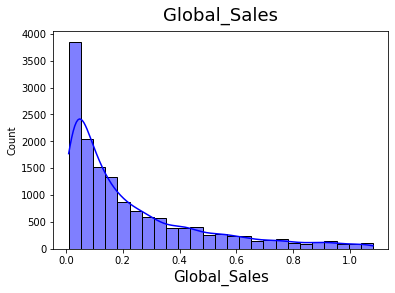

In [77]:
# Analyze Columns
print(df['Genre'].value_counts())
print(df['Platform'].value_counts())

fig = plt.figure(figsize=(19, 15))
plt_hist(df=df, col='Global_Sales', title='Global_Sales')

In [78]:
# Exclude Platforms with very little number of games
MIN_GAMES = 100
platforms = df['Platform'].value_counts()
platforms = platforms[platforms > MIN_GAMES]
platforms = platforms.index.tolist()
print(platforms)
df = df[df['Platform'].isin(platforms)]

['DS', 'PS2', 'Wii', 'PSP', 'PS3', 'X360', 'PS', 'PC', 'XB', 'GBA', 'GC', '3DS', 'PSV', 'PS4', 'N64', 'XOne', 'SNES', 'SAT', 'WiiU', '2600']


## Analysis

In [105]:
# Group By Platform and Year_of_Release, then get mean of sales
df2 = df.groupby(['Platform', 'Genre'], as_index=False).sum()
df2.head(n=30)

,Platform,Genre,Global_Sales
0,2600,Action,23.92
1,2600,Adventure,0.40
2,2600,Fighting,1.24
3,2600,Misc,2.43
4,2600,Platform,3.31
5,2600,Puzzle,3.58
6,2600,Racing,1.73
7,2600,Shooter,8.30
8,2600,Simulation,0.45
9,2600,Sports,3.43


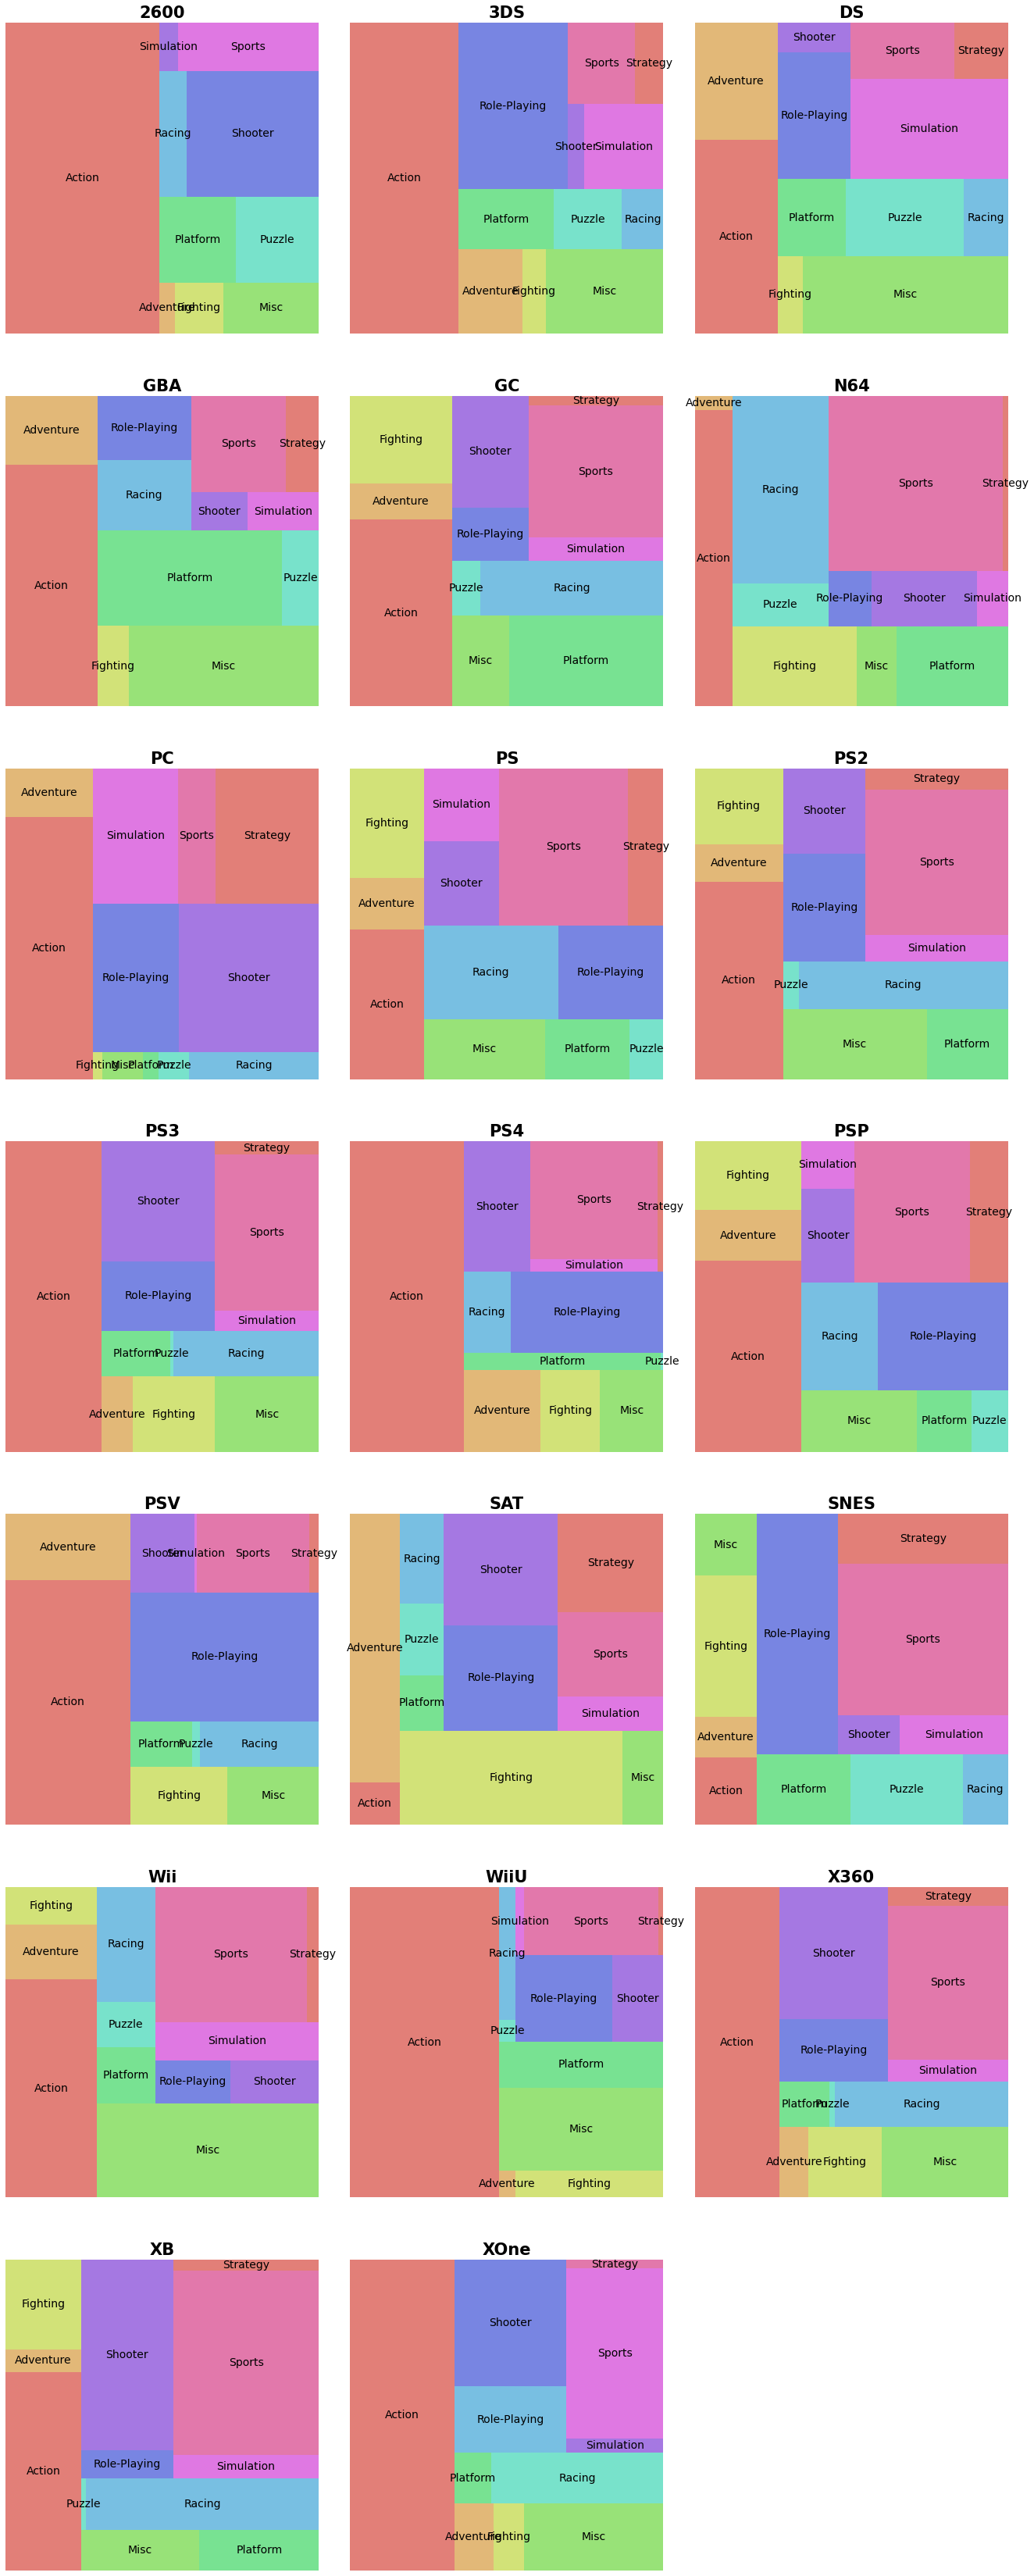

In [106]:
# now, plot a treemap for each platform and genre
# use squarify
import squarify

fig = plt.figure(figsize=(23, 60))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

for i, platform in enumerate(df2['Platform'].unique()):
    # filter
    df3 = df2[df2['Platform'] == platform]
    # plot
    ax = fig.add_subplot(7, 3, i+1)
    squarify.plot (sizes=df3['Global_Sales'], label=df3['Genre'],
                    alpha=.8, color = sns.color_palette("hls", 11),
                    text_kwargs={'fontsize': 14}, ax=ax)
    ax.set_title(platform, fontsize=21, fontweight="bold")
    ax.axis('off')
    # make borders black
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

In [107]:
df2

,Platform,Genre,Global_Sales
0,2600,Action,23.92
1,2600,Adventure,0.40
2,2600,Fighting,1.24
3,2600,Misc,2.43
4,2600,Platform,3.31
...,...,...,...
232,XOne,Role-Playing,3.74
233,XOne,Shooter,7.13
234,XOne,Simulation,0.69
235,XOne,Sports,8.25


- for each platform:  
  -    for each genre:  
      add ratio of its sales / sales of all genres in that platform
      to a new column called 'ratio'

In [108]:
# get total sales fot each genre
genre_sales = df2.groupby('Genre')['Global_Sales'].sum()
genre_sales = genre_sales.sort_values(ascending=False)
genre_sales

Genre
Action          722.95
Sports          565.61
Misc            340.76
Role-Playing    290.06
Shooter         283.66
Racing          266.55
Fighting        186.90
Platform        180.38
Simulation      174.01
Adventure       148.65
Strategy        108.84
Puzzle           82.82
Name: Global_Sales, dtype: float64

In [109]:
# get total sales for each platform
platform_sales = df2.groupby('Platform')['Global_Sales'].sum()
platform_sales = platform_sales.sort_values(ascending=False)
platform_sales

Platform
PS2     489.27
DS      356.43
PS3     342.97
X360    321.17
Wii     299.92
PS      292.98
PSP     190.34
XB      169.82
GBA     162.82
PC      110.75
GC      107.70
3DS      89.01
N64      80.29
PS4      72.66
SNES     57.74
2600     48.79
XOne     48.77
PSV      45.47
WiiU     33.79
SAT      30.50
Name: Global_Sales, dtype: float64

In [110]:
# get percentage of sales for each genre
# df2['Genre_Sales_Ratio'] = df2['Global_Sales'] / df2['Total_Sales']

# divide by total sales of genre instead
# df2['Genre_Sales_Ratio'] = df2['Global_Sales'] / genre_sales[df2['Genre']].values

# divide by total sales of platform * genre
df2['Genre_Sales_Ratio'] = df2['Global_Sales'] / (platform_sales[df2['Platform']].values * genre_sales[df2['Genre']].values)

df2.head()

,Platform,Genre,Global_Sales,Genre_Sales_Ratio
0,2600,Action,23.92,0.000678
1,2600,Adventure,0.40,0.000055
2,2600,Fighting,1.24,0.000136
3,2600,Misc,2.43,0.000146
4,2600,Platform,3.31,0.000376


In [111]:
# Drop Unnecessary Columns
df3 = df2[['Platform', 'Genre', 'Genre_Sales_Ratio']]
df3.head()

,Platform,Genre,Genre_Sales_Ratio
0,2600,Action,0.000678
1,2600,Adventure,0.000055
2,2600,Fighting,0.000136
3,2600,Misc,0.000146
4,2600,Platform,0.000376


In [118]:
# Pivot Table
df4 = df3.pivot(index='Platform', columns='Genre', values='Genre_Sales_Ratio')
df4 = df4 * 1000

# convert NaNs to 0
df4 = df4.fillna(0)

df4.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,0.678144,0.055152,0.135982,0.146159,0.376105,0.885966,0.133026,0.000000,0.599721,0.053004,0.124293,0.000000
3DS,0.478479,0.370333,0.108800,0.298704,0.326365,0.510051,0.096099,0.644118,0.051092,0.396420,0.099513,0.216766
DS,0.227529,0.671721,0.106730,0.478852,0.300967,1.126373,0.130939,0.328284,0.078334,0.930471,0.105456,0.285355
GBA,0.315774,0.438785,0.138346,0.462488,1.000699,0.435306,0.253689,0.213858,0.077947,0.161653,0.165377,0.303589
GC,0.270351,0.253598,0.489837,0.156949,0.801980,0.192831,0.382131,0.144689,0.310309,0.188892,0.322903,0.127111


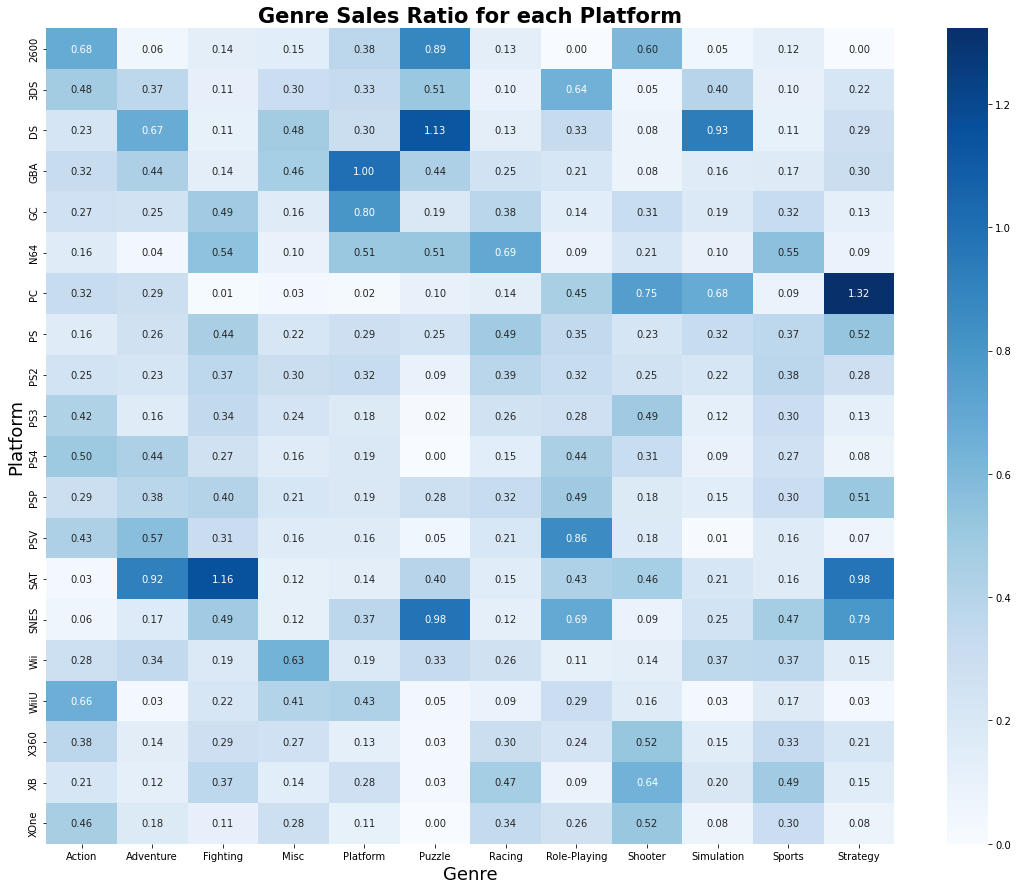

In [119]:
# Plot Heatmap
fig = plt.figure(figsize=(19, 15))
sns.heatmap(df4, cmap='Blues', annot=True, fmt='.2f')
plt.title('Genre Sales Ratio for each Platform', fontsize=21, fontweight="bold")
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Platform', fontsize=18)
plt.show()

In [124]:
res = []
for platform in df4.index:
    res += [(platform, df4.loc[platform].index.tolist(), df4.loc[platform].values.tolist())]
#
# makes res a list of (platofrm, genre, value)
res = [list([x[0]] + list(zip(x[1], x[2]))) for x in res]
res = [(x[0], y[0], y[1]) for x in res for y in x[1:]]
res
# format floats to 4 decimal places
res = [(p, g, round(v, 4)) for p, g, v in res]

# take top few
N=20
res = [(p, g, v) for p, g, v in res if v >= THRESHOLD]
res.sort(key=lambda x: x[2], reverse=True)
res[:N]

[('PC', 'Strategy', 1.3224),
 ('SAT', 'Fighting', 1.156),
 ('DS', 'Puzzle', 1.1264),
 ('GBA', 'Platform', 1.0007),
 ('SNES', 'Puzzle', 0.9787),
 ('SAT', 'Strategy', 0.976),
 ('DS', 'Simulation', 0.9305),
 ('SAT', 'Adventure', 0.9175),
 ('2600', 'Puzzle', 0.886),
 ('PSV', 'Role-Playing', 0.8553),
 ('GC', 'Platform', 0.802),
 ('SNES', 'Strategy', 0.7924),
 ('PC', 'Shooter', 0.7547),
 ('N64', 'Racing', 0.6934),
 ('SNES', 'Role-Playing', 0.6896),
 ('PC', 'Simulation', 0.6818),
 ('2600', 'Action', 0.6781),
 ('DS', 'Adventure', 0.6717),
 ('WiiU', 'Action', 0.6562),
 ('3DS', 'Role-Playing', 0.6441)]

### Explanation of the relation

#### 1. PC & Strategy Games

    PC is a very very flexible platform and has a wide variety of setups, users basically create their dream platform using it.  
    Strategy games often involve a lot of observations and focus on singals and metrics with too much details.  
    PC players can have a setup of more than one monitor for the details, observation, signals and metrics to watch out for.  
    PC players also have mouse, keyboard and even joystics to offer both precise and fast controls

#### 2. GBA & Platform

    GBA is a handheld console with D-pad and a few number of buttons, this makes it perfect for casual players who just want to plug-and-play with no hassle.  
    Platform games are usually played in short sessions, have basic movements and not very much is going on the screen.  
    Platform games could be fast-paced which requires fast controls.
    GBA also has a D-pad which is both fast to reach and precise to control.